# Coding outside of Jupyter notebooks

We have used Jupyter notebooks in this class as a useful tool for integrating text and interactive, usable code. However, most real life coding work would not use Jupyter notebooks but would instead be accomplished by typing the code in text files and then running them via a terminal window or in iPython. Many of you have done this before, perhaps analogously in Matlab by writing your code in a `.m` file and then running it in the Matlab GUI. Writing code in a separate file allows more heavy computations as well as allowing that code to be reused more easily that when it is written in a Jupyter notebook.

Here, we will demonstrate typing Python code in a `.py` file and then running it in an iPython window.

In [19]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
x = np.linspace(0, 10)
y = x**2

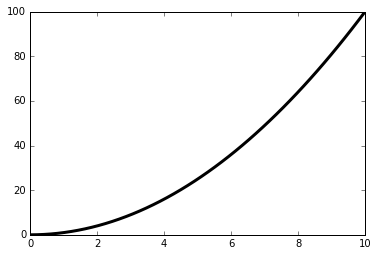

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'k', lw=3)

Now let's switch to a terminal window and a text file...

# A. Open iPython

Open a terminal window/command prompt and type

> ipython

Note that we will use this syntax to mean that it is something to be typed in your terminal window/command prompt (or it is part of an exercise). To open ipython with some niceties added so that you don't have to import them by hand each time you open the program (numpy and matplotlib in particular), open it with

> ipython --pylab

Once you have done this, you'll see a series of text lines indicating that you are now in the program ipython. You can now type code as if you were in a code window in a Jupyter notebook. 

---
### *Exercise*

> Copy in the code to define `x` and `y` from above, then make the figure. Notice how the figure appears as a separate window. Play with the figure window — you can change the size and properties of the plot using the GUI buttons, and you can zoom.

---

# B. Text editor

A typical coding set up is to have a terminal window with ipython running alongside a text window where you type your code. You can then go back and forth, trying things out in iPython, and keeping what works in the text window so that you finish with a working script, which can be run independently in the future. This is, of course, what you've been doing when you use Jupyter notebooks, except everything is combined into one place in that sort of setup. If you are familiar with Matlab, this is what you are used to when you have your Matlab window with your `*.m` text window alongside a "terminal window" where you can type things. (There is also a variable viewer included in Matlab.)

A good text editor should be able to highlight syntax – that is, use color and font style to differentiate between special key words and types for a given programming language. This is what has been happening in our Jupyter notebooks, when strings are colored red, for example. The editors will also key off typical behaviors in the language to try to be helpful, such as when in a Jupyter notebook if you write an `if` statement with a colon at the end and push `enter`, the next line will be automatically indented so that you can just start typing. These behaviors can be adjusted by changing user settings.

We like to use [TextMate](https://macromates.com/) for Mac, which costs money, and [Sublime Text](https://www.sublimetext.com/) which works on all operating systems and also costs money. For this class, we recommend using [Atom](https://atom.io/), which is free, works across operating systems, and integrates with GitHub since they wrote it.

So, go download Atom and start using it, unless you have a preferred alternative you want to use.

---
### *Exercise*

> Copy and paste the code from above into a new text file in your text editor. Save it, then run the file in ipython with

> run [filename]

---

# C. Run a script

When you use the command `run` in iPython, parts of the code in that file are implemented as if they were written in the iPython window itself. Code that is outside of a function call will run: at 0 indentation level (import statements and maybe some variables definitions are common), but not any functions, though it will read the functions into your local variables so that they can be used. Code inside the line `if __name__ == '__main__':` will also be run.

Note anytime you are accessing a saved file from iPython, you need to have at least one of the following be true:

* be in the same directory in your terminal window as the file;
* reference the file with either its full path or a relative path;
* have the path to your file be appended to the environmental variable PYTHONPATH.

---
### *Exercise*

> Within your iPython window, run the example code in examples/optimal_interpolation.py. Which part of the code actually runs? Why?

> Add some `print` statements into the script at 0 indentation as well as below the line `if __name__ == '__main__':` and see what comes through when you run the code. Can you access the class `oi_1d`?

---

# D. Importing your own code

The point of importing code is to be able to then use the functions and classes that you've written in other files. Importing your own code is just like importing `numpy` or any other package. You use the same syntax and you have the same ability to query the built-in methods.

> import numpy

or:

> import [your_code]

When you import a package, any code at the 0 indentation level will run; however, the code within `if __name__ == '__main__':` will not run.

When you are using a single script for analysis, you may just use `run` to use your code. However, as you build up complexity in your work, you'll probably want to make separate, independent code bases that can be called from subsequent code (again, just like us using the capabilities in `numpy`) by importing them.

When you import a package, a `*.pyc` file is created which holds compiled code that is subsequently read when the package is again imported, in order to save time. When you are in a single session in iPython, that `*.pyc` will be used and not updated. If you have changed the code and want it to be updated, you either need to exit iPython and reopen it, or you need to `reload` the package. These is different syntax for this depending on the version of Python you are using:

**For >= Python3.4:**

    import importlib
    importlib.reload(module)

**For <= Python3.3:**

    import imp
    imp.reload(module)

**For Python2.x:**

Use the in-built reload() function:

    reload(module)

---
### *Exercise*

> Import `optimal_interpolation.py`. Add a print statement with 0 indentation level in the code. Import the package again. Does the print statement run? Reload the package. How about now?

> What about if you run it instead of importing it?


### *Exercise*

> Write your own simple script with a function in it — your function should take at least one input (maybe several numbers) and return something (maybe a number that is the result of some calculation). 

> Now, use your code in several ways. Run the code in ipython with

> run [filename]

> Make sure you have a __name__ definition for this. Now import the code and use it:

> import [filename]

> Add a docstring to the top of the file and reload your package, then query the code. Do you see the docstring? Add a docstring to the function in the file, reload, and query. Do you see the docstring?

> You should have been able to run your code both ways: running it directly, and importing it, then using a function that is within the code.

---

# E. Unit testing

The idea of unit testing is to develop tests for your code as you develop it, so that you automatically know if it is working properly as you make changes. In fact, some coders prefer to write the unit tests first to drive the proper development of their code and to know when it is working. Of course, the quality of the testing is made up of the tests you include and aspects of your code that you test. 

Here are some unit test [guidelines](http://docs.python-guide.org/en/latest/writing/tests/):

* Generally, you want to write unit tests that test one small aspect of your code functionality, as separately as possible from other parts of it. Then write many of these tests to cover all aspects of functionality.
* Make sure your unit tests run very quickly since you may end up with many of them
* Always run the full test suite before a coding session, and run it again after. This will give you more confidence that you did not break anything in the rest of the code.
* You can now run a program like [Travis CI](https://travis-ci.com/) through GitHub which runs your test suite before you push your code to your repository or merge a pull request.
* Use long and descriptive names for testing functions. The style guide here is slightly different than that of running code, where short names are often preferred. The reason is testing functions are never called explicitly. square() or even sqr() is ok in running code, but in testing code you would have names such as test_square_of_number_2(), test_square_negative_number(). These function names are displayed when a test fails, and should be as descriptive as possible.
* Include detailed docstrings and comments throughout your testing files since these may be read more than the original code.

How to set up a suite of unit tests:

1. make a `tests` directory in your code (or for simple code, just have your test file in the same directory);
1. make a new file to hold your tests, called `tests*.py` — it must start with "test" for it to be noticed by testing programs;
1. inside `tests*.py`, write a test function called `test_*()` — the testing programs look for functions with these names in particular and ignore other functions;
1. use functions like `assert` and `np.allclose` for numeric comparisons of function outputs and checking for output types.
1. run testing programs on your code. I recommend [nosetests](http://nose.readthedocs.org/en/latest/usage.html) or [pytest](http://pytest.org/latest/). You use these by running `nosetests` or `py.test` from the terminal window in the directory with your test code in it (or pointing to the directory).

Can load files into Jupyter notebooks using the magic command `%load`. You can then run the code inside the notebook if you want, or just look at it.

In [26]:
# %load ../examples/package.py
def add(x, y):
    """doc """

    return x+y

print(add(1, 2))

if __name__ == '__main__':
    print(add(1, 1))


3
2


In [27]:
# %load ../examples/test.py
"""Test package.py"""

import package
import numpy as np


def test_add_12():
    """Test package with inputs 1, 2"""

    assert package.add(1, 2) == np.sum([1, 2])


Now, run the test. We can do this by escaping to the terminal, or we can go to our terminal window and run it there.

Note: starting a line of code with "!" makes it from the terminal window. Some commands are so common that you don't need to use the "!" (like `ls`), but in general you need it.

In [24]:
!nosetests ../examples/

.
----------------------------------------------------------------------
Ran 1 test in 0.064s

OK


---
### *Exercise*

> Start another file called `test*.py`. In it, write a test function, `test_*()`, that checks the accuracy of your original function in some way. Then run it with `py.test` and `nosetests`. We'll share examples as a class.

---

# F. PEP 0008

A [PEP](https://www.python.org/dev/peps/pep-0001/) is a Python Enhancement Proposal, describing ideas for design or processes to the Python community. The list of the PEPs is [available online](https://www.python.org/dev/peps/).

[PEP 0008](https://www.python.org/dev/peps/pep-0008/) is a set of style guidelines for writing good, clear, readable code, written with the assumption that code is read more often than it is written. These address questions such as, when a line of code is longer than one line, how should it be indented? And speaking of one line of code, how long should it be? Note than even in this document, they emphasize that these are guidelines and sometimes should be trumped by what has already been happening in a project or other considerations. But, generally, follow what they say here.

Here is a list of some style guidelines to follow, but check out the full guide for a wealth of good ideas:

* indent with spaces, not tabs
* indent with 4 spaces
* limit all lines to a maximum of 79 characters
* put a space after a comma
* avoid trailing whitespace anywhere

Note that you can tell your text editor to enforce pep8 style guidelines to help you learn. This is called a linter. I do this with a plug-in in Sublime Text. You can [get one](https://github.com/AtomLinter/linter-pep8) for Atom.

---
### *Exercise*

> Go back and clean up your code you've been writing so that it follows pep8 standards.

---

# G. Docstrings

Docstrings should be provided at the top of a code file for the whole package, and then for each function/class within the package.

## Overall style

Overall style for docstrings is given in [PEP 0257](https://www.python.org/dev/peps/pep-0257/), and includes the following guidelines:

* one liners: for really obvious functions. Keep the docstring completely on one line:
> def simple_function():
>     """Simple functionality."""

* multiliners: Multi-line docstrings consist of a summary line just like a one-line docstring, followed by a blank line, followed by a more elaborate description. The summary line may be used by automatic indexing tools; it is important that it fits on one line and is separated from the rest of the docstring by a blank line. The summary line may be on the same line as the opening quotes or on the next line.
> def complex_function():
>     """
>     One liner describing overall.
>
>     Now more involved description of inputs and outputs.
>     Possibly usage example(s) too.
>     """

## Styles for inputs/outputs

For the more involved description in the multi line docstring, there are several standards used. (These are summarized nicely in a [post](http://stackoverflow.com/questions/3898572/what-is-the-standard-python-docstring-format) on Stack Overflow; this list is copied from there.)

1. [reST](https://www.python.org/dev/peps/pep-0287/)
> def complex_function():
>     """
>     This is a reST style.
>  
>     :param param1: this is a first param
>     :param param2: this is a second param
>     :returns: this is a description of what is returned
>     :raises keyError: raises an exception
>     """

1. [Google](http://google.github.io/styleguide/pyguide.html#Python_Language_Rules)
> def complex_function():
>     """
>     This is an example of Google style.
>  
>     Args:
>         param1: This is the first param.
>         param2: This is a second param.
>     
>     Returns:
>         This is a description of what is returned.
>     
>     Raises:
>         KeyError: Raises an exception.
>     """

1. [Numpydoc](https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt)
> def complex_function():
>     """
>     Numpydoc format docstring.
>     
>     Parameters
>     ----------
>     first : array_like
>         the 1st param name `first`
>     second :
>        the 2nd param
>     third : {'value', 'other'}, optional
>         the 3rd param, by default 'value'
>     
>     Returns
>     -------
>     string
>         a value in a string
>     
>     Raises
>     ------
>     KeyError
>         when a key error
>     OtherError
>         when an other error
>     """

# H. Documentation generation

[Sphinx](http://www.sphinx-doc.org/en/stable/index.html) is a program that can be run to generate documentation for your project from your docstrings. You basically run the program and if you use the proper formatting in your docstrings, they will all be properly pulled out and presented nicely in a coherent way. There are various additions you can use with Sphinx in order to be able to write your docstrings in different formats (as shown above) and still have Sphinx be able to interpret them. For example, you can use [Napoleon](http://sphinxcontrib-napoleon.readthedocs.org/en/latest/) with Sphinx to be able to write using the Google style instead of reST, meaning that you can have much more readable docstrings and still get nicely-generated documentation out. Once you have generated this documentation, you can publish it using [Read the docs](https://readthedocs.org/). Here is documentation on readthedocs for a package that converts between colorspaces, [Colorspacious](https://colorspacious.readthedocs.org/en/latest/).

Another approach is to use Sphinx, but link it with [GitHub Pages](https://pages.github.com/), which is hosting directly from your GitHub repo page. Separately from documentation, I use GitHub Pages for [my own website](http://kristenthyng.com). I also use one for documentation for a package of mine, [cmocean](http://matplotlib.org/cmocean/) that provides colormaps for oceanography. To get this running, I followed instructions [online](http://gisellezeno.com/tutorials/sphinx-for-python-documentation.html). Note that GitHub pages is built using Jekyll but in this case we tell it not to use Jekyll and instead use Sphinx.


show comparison of docstrings in my code, the .rst file, and the final result on github

In [ ]:
# %load https://raw.githubusercontent.com/matplotlib/cmocean/master/docs/source/index.rst
.. cmocean documentation master file, created by
   sphinx-quickstart on Fri Jul 17 19:43:49 2015.
   You can adapt this file completely to your liking, but it should at least
   contain the root `toctree` directive.

Beautiful colormaps for oceanography: `cmocean <http://github.com/matplotlib/cmocean>`_
=======================================================================================

This package contains colormaps for standardizing commonly-plotting oceanographic variables. Most of the colormaps started from `matplotlib <http://matplotlib.org/>`_ colormaps, but have now been adjusted using the `viscm tool <https://github.com/BIDS/viscm>`_ to be `perceptually uniform <http://bids.github.io/colormap/>`_.

Here is our gallery:

.. plot::
   :include-source:

   import cmocean
   cmocean.plots.plot_gallery()

These colormaps were chosen to be perceptually uniform and to reflect the data they are representing in terms of being sequential, divergent, or cyclic (Phase colormap), and to be intuitive. For example, chlorophyll is represented by shades of green, turbidity is shades of brown, and temperature goes from cool blues to warm yellows.

Here is the lightness of the colormaps:

.. plot::
   :include-source:

   import cmocean
   cmocean.plots.plot_lightness()


It is probably better to think in cam02ucs colorspace, in which Euclidean distance is made to be equivalent to changes in human perception. Plots of these colormaps in this colorspace and with some other important properties are seen using the `viscm tool <https://github.com/BIDS/viscm>`_.

Here are some properties from the Salinity colormap. We can see that the colormap prints nicely to grayscale, has consistent perceptual deltas across the colormap, and good viewability for people with color blindness. It has a smooth representation in its 3D colorspace, and detail in the images is clear.

.. plot::
   :include-source:

   import cmocean
   cmocean.plots.wrap_viscm(cmocean.cm.salt)


All of the evaluations of the colormaps using the viscm tool are shown in the page :ref:`colormaps_viscm`.

Colormap details
----------------

Bathymetry
^^^^^^^^^^

The Bathymetry colormap is sequential from light yellow for shallower water through pale green to increasingly dark blue and purple to represent increasing depth. Nicknames for this colormap are 'bathymetry' and 'bathy', and the units are typically given as [m].

.. plot::
   :include-source:

   import cmocean
   import matplotlib.pyplot as plt

   fig = plt.figure(figsize=(8, 3))
   ax = fig.add_subplot(1, 2, 1)
   cmocean.plots.test(cmocean.cm.bathy, ax=ax)
   ax = fig.add_subplot(1, 2, 2)
   cmocean.plots.quick_plot(cmocean.cm.bathy, ax=ax)

CDOM
^^^^

The Colored Dissolved Organic Matter (CDOM) colormap is sequential with whitish-yellow for low values and increasing in pink with increasing value to represent an increase in material in the water. Two examples of this colormap are shown below, from Texas A&M University gliders. Nicknames for this colormap are 'CDOM' and 'cdom', and the units are typically given as [mg/m^3].

.. image:: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_540/plots/sci_flbbcd_cdom_units.png
   :target: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_540/plots/sci_flbbcd_cdom_units.png
.. image:: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_541/plots/sci_flbbcd_cdom_units.png
   :target: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_541/plots/sci_flbbcd_cdom_units.png

Chlorophyll
^^^^^^^^^^^

The Chlorophyll colormap is sequential with whitish-green for low values and increasing in green with increasing value to represent an increase in this green material in the water. Two examples of this colormap are shown below, from Texas A&M University gliders. Nicknames for this colormap are 'chl', 'chloro', and 'chlorophyll', and the units are typically given as [mg/m^3]. This colormap is based on matplotlib's Greens, but was recreated from scratch using the viscm tool.

.. image:: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_540/plots/sci_flbbcd_chlor_units.png
   :target: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_540/plots/sci_flbbcd_chlor_units.png
.. image:: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_541/plots/sci_flbbcd_chlor_units.png
   :target: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_541/plots/sci_flbbcd_chlor_units.png

Density
^^^^^^^

The Density colormap is sequential with whitish-blue for low values and increasing in purple with increasing value to represent an increase in water density. Two examples of this colormap are shown below, from Texas A&M University gliders. Nicknames for this colormap are 'density' and 'rho', and the units are typically given as [kg/m^3]. This colormap is based on matplotlib's Purples, but was recreated from scratch using the viscm tool.

.. image:: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_540/plots/calc_density.png
   :target: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_540/plots/calc_density.png
.. image:: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_541/plots/calc_density.png
   :target: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_541/plots/calc_density.png

Free Surface
^^^^^^^^^^^^

The Free Surface colormap is diverging with dark blue to off-white to dark red representing negative to zero to positive sea surface elevation, with deviations in the surface elevations as shades of color away from neutral off-white. Shades of red have been chosen to represent sea surface elevation above the reference value (often mean sea level) to connect with warmer water typically being associated with an increase in the free surface, such as with the Loop Current in the Gulf of Mexico. An example of this colormap is from a numerical simulation of the Texas and Louisiana shelf. Nicknames for this colormaps are 'seasurface', 'freesurface', 'zeta', and 'eta', and the units are typically given as [m]. This colormap is based on matplotlib's RdBu, but was recreated from scratch using the viscm tool.

.. image:: http://pong.tamu.edu/~kthyng/movies/txla_plots/ssh/2010-07-30T00.png
   :target: http://pong.tamu.edu/~kthyng/movies/txla_plots/ssh/2010.mp4

Gray
^^^^

The Gray colormap is sequential from white to black, with uniform steps through perceptual colorspace. This colormap is generic to be used for any sequential dataset. Nicknames for this colormap are 'Gray', 'Grays', 'Grey', 'Greys', 'gray', 'grays', 'grey', and 'greys'.

.. plot::
   :include-source:

   import cmocean
   import matplotlib.pyplot as plt

   fig = plt.figure(figsize=(8, 3))
   ax = fig.add_subplot(1, 2, 1)
   cmocean.plots.test(cmocean.cm.grey, ax=ax)
   ax = fig.add_subplot(1, 2, 2)
   cmocean.plots.quick_plot(cmocean.cm.grey, ax=ax)

Oxygen
^^^^^^

The Oxygen colormap is sequential for most of the colormap, representing the normal range of oxygen saturation in ocean water, and diverging 80% of the way into the colormap to represent a state of supersaturation. The bottom 20% of the colormap is colored reddish to highlight hypoxic or low oxygen water, but to still print relatively seamlessly into grayscale in case the red hue is not important for an application. The top 20% of the colormap, after the divergence, is colored yellow to highlight the supersaturated water. The minimum and maximum values of this colormap are meant to be controlled in order to properly place the low oxygen and supersaturated oxygen states properly. This colormap was developed for the Mississippi river plume area where both low and supersaturated conditions are regularly seen and monitored. Examples of this colormap (without colorbar limits being controlled to set the values of the red and yellow regions) are shown from Texas A&M University gliders. Nicknames for this colormap are 'oxygen' and 'o2', and the units are typically given as [m/l].

.. image:: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_540/plots/sci_oxy4_oxygen.png
   :target: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_540/plots/sci_oxy4_oxygen.png
.. image:: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_541/plots/sci_oxy4_oxygen.png
   :target: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_541/plots/sci_oxy4_oxygen.png

PAR
^^^

The Photosynthetically Available Radiation (PAR) colormap is sequential from dark brown for low values to increasingly bright yellow to represent an increase in radiation in the water. Nicknames for this colormap are 'PAR' and 'par', and the units are typically given as [W/m^2].

.. plot::
   :include-source:

   import cmocean
   import matplotlib.pyplot as plt

   fig = plt.figure(figsize=(8, 3))
   ax = fig.add_subplot(1, 2, 1)
   cmocean.plots.test(cmocean.cm.par, ax=ax)
   ax = fig.add_subplot(1, 2, 2)
   cmocean.plots.quick_plot(cmocean.cm.par, ax=ax)

Phase
^^^^^

The Phase colormap is circular, spanning all hues at a set lightness value. This map is intended to be used for properties such as wave phase and tidal phase which wrap around from 0˚ to 360˚ to 0˚ and should be represented without major jumps in the colormap. Nicknames for this colormap are 'phase', 'direction', and 'direct', and the units are typically given as [˚]. An example for a circular plot is shown below.

.. plot::
   :include-source:

   import cmocean
   import matplotlib.pyplot as plt
   import numpy as np

   azimuths = np.arange(0, 361, 1)
   zeniths = np.arange(40, 70, 1)
   values = azimuths * np.ones((30, 361))
   fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
   ax.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap=cmocean.cm.phase)
   ax.set_yticks([])

Salinity
^^^^^^^^

The Salinity colormap is sequential with dark blue representing lower salinity or fresher water, transitioning through greens to light yellow representing increased salinity or saltier water. Several examples of this colormap are shown below, from Texas A&M University gliders and a simulation of the Texas and Louisiana shelf region. Nicknames for this colormap are 'salt' and 'salinity', and the units are typically given as [g/kg] or [ppt]. This colormap is based on matplotlib's YlGnBu, but was recreated from scratch using the viscm tool.

.. image:: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_540/plots/calc_salinity.png
   :target: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_540/plots/calc_salinity.png
.. image:: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_541/plots/calc_salinity.png
   :target: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_541/plots/calc_salinity.png
.. image:: http://pong.tamu.edu/~kthyng/movies/txla_plots/salt/2010-07-30T00.png
   :target: http://pong.tamu.edu/~kthyng/movies/txla_plots/salt/2010.mp4

Speed
^^^^^

The Speed colormap is sequential from light greenish yellow representing low values to  with dark yellowish green representing large values. This colormap is the positive half of the velocity colormap, for consistency. An example of this colormap is from a numerical simulation of the Texas and Louisiana shelf. Nicknames for this colormaps are 'speed' and 's', and the units are typically given as [m/s].

.. image:: http://pong.tamu.edu/~kthyng/movies/txla_plots/speed/2010-07-30T00.png
   :target: http://pong.tamu.edu/~kthyng/movies/txla_plots/speed/2010.mp4

Temperature
^^^^^^^^^^^

The Temperature colormap is sequential with dark blue representing lower temperature, transitioning through reds to yellow representing increased temperature. This colormap is meant to appeal to intuition of cooler colors representing cooler temperature and warmer colors as warmer temperature, but to be a sequential colormap to represent data between two temperatures (instead of a diverging, blue to white to red diverging colormap, for example). Several examples of this colormap are shown below, from Texas A&M University gliders and a simulation of the Texas and Louisiana shelf region. Nicknames for this colormap are 'temp' and 'temperature', and the units are typically given as [˚ Celsius]. This colormap is based on matplotlib's YlGnBu, but was recreated from scratch using the viscm tool.

.. image:: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_540/plots/sci_water_temp.png
   :target: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_540/plots/sci_water_temp.png
.. image:: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_541/plots/sci_water_temp.png
   :target: http://gcoos2.tamu.edu/gandalf_data/deployments/tamu/unit_541/plots/sci_water_temp.png
.. image:: http://pong.tamu.edu/~kthyng/movies/txla_plots/temp/2010-07-30T00.png
   :target: http://pong.tamu.edu/~kthyng/movies/txla_plots/temp/2010.mp4

Turbidity
^^^^^^^^^

The Turbidity colormap is sequential from light to dark brown to represent an increase in sediment in the water. Nicknames for this colormap are 'turbidity' and 'turb', and the units are typically given as [NTU].

.. plot::
   :include-source:

   import cmocean
   import matplotlib.pyplot as plt

   fig = plt.figure(figsize=(8, 3))
   ax = fig.add_subplot(1, 2, 1)
   cmocean.plots.test(cmocean.cm.turb, ax=ax)
   ax = fig.add_subplot(1, 2, 2)
   cmocean.plots.quick_plot(cmocean.cm.turb, ax=ax)

Velocity
^^^^^^^^

The Velocity colormap is diverging from darker blues to just off-white through shades of yellow green representing diverging velocity values around a critical value (usually zero). The speed colormap is the positive half of this colormap, for consistency. An example of this colormap is from a numerical simulation of the Texas and Louisiana shelf. Nicknames for this colormaps are 'velocity', 'vel', 'u', and 'v', and the units are typically given as [m/s]. This colormap was inspired by `Francesca Samsel's <http://www.francescasamsel.com/>`_ similar colormap, but generated from scratch using the viscm tool.

.. image:: http://pong.tamu.edu/~kthyng/movies/txla_plots/u/2010-07-30T00.png
   :target: http://pong.tamu.edu/~kthyng/movies/txla_plots/u/2010.mp4

Vorticity
^^^^^^^^^

The Vorticity colormap is diverging from darker teal to just off-white through shades of magenta representing diverging vorticity values around a critical value (usually zero). The Wave Period colormap is the negative half of this colormap (with inverse units). An example of this colormap is from a numerical simulation of the Texas and Louisiana shelf. Nicknames for this colormaps are 'vorticity' and 'vort', and the units are typically given as [1/s].

.. image:: http://pong.tamu.edu/~kthyng/movies/txla_plots/vort/2010-07-30T00.png
   :target: http://pong.tamu.edu/~kthyng/movies/txla_plots/vort/2010.mp4

Wave Height
^^^^^^^^^^^

The Wave Height colormap is sequential from whitish to dark red representing an increase in wave height values. The Wave Height colormap is the positive half of the Free Surface colormap to be consistent with units. Nicknames for this colormaps are 'waveheight', 'waveheight', 'swh', and 'height', and the units are typically given as [m].

.. plot::
   :include-source:

   import cmocean
   import matplotlib.pyplot as plt

   fig = plt.figure(figsize=(8, 3))
   ax = fig.add_subplot(1, 2, 1)
   cmocean.plots.test(cmocean.cm.swh, ax=ax)
   ax = fig.add_subplot(1, 2, 2)
   cmocean.plots.quick_plot(cmocean.cm.swh, ax=ax)

Wave Period
^^^^^^^^^^^

The Wave Period colormap is sequential from whitish to dark teal representing an increase in wave period values. This colormap is the negative half of the Vorticity colormap, with inverse units. Nicknames for this colormaps are 'waveperiod' and 'period', and the units are typically given as [s].

.. plot::
   :include-source:

   import cmocean
   import matplotlib.pyplot as plt

   fig = plt.figure(figsize=(8, 3))
   ax = fig.add_subplot(1, 2, 1)
   cmocean.plots.test(cmocean.cm.period, ax=ax)
   ax = fig.add_subplot(1, 2, 2)
   cmocean.plots.quick_plot(cmocean.cm.period, ax=ax)


Capabilities
------------

The colormaps are all available in ``cmocean.cm``. They can be accessed, and simply plotted, as follows:

.. plot::
   :include-source:

   import cmocean
   import matplotlib.pyplot as plt

   fig = plt.figure(figsize=(8, 3))
   ax = fig.add_subplot(1, 2, 1)
   cmocean.plots.test(cmocean.cm.temp, ax=ax)
   ax = fig.add_subplot(1, 2, 2)
   cmocean.plots.quick_plot(cmocean.cm.chl, ax=ax)

All available nicknames of the colormaps can be accessed with ``cmocean.cm.cmnames``:

.. ipython:: python

   import cmocean

   cmocean.cm.cmnames


The distinct colormap instances can be accessed with:

.. ipython:: python

   import cmocean
   
   cmaps = cmocean.cm.cmall;

Print all of the available colormaps to text files with 256 rgb entries with:

``cmaps = cmocean.cm.cmall``

``cmocean.tools.print_colormaps(cmaps)``

Output a dictionary to define a colormap with:

.. ipython:: python

   import cmocean

   cmdict = cmocean.tools.get_dict(cmocean.cm.cdom, N=9)
   print cmdict

Make a colormap instance with ``cmap = cmocean.tools.cmap(rgbin, N=10)`` given the rgb input array.

Reversed versions of all colormaps are available by appending "_r" to the colormap name, just as in matplotlib:

.. plot::
   :include-source:

   import cmocean
   import matplotlib.pyplot as plt

   fig = plt.figure(figsize=(8, 3))
   ax = fig.add_subplot(1, 2, 1)
   cmocean.plots.test(cmocean.cm.gray, ax=ax)
   ax = fig.add_subplot(1, 2, 2)
   cmocean.plots.test(cmocean.cm.gray_r, ax=ax)
   fig.tight_layout()


Resources
---------

Here are some of my favorite resources.

Examples of beautiful visualizations:
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

* Earth wind/currents/temperature/everything `visualization <http://earth.nullschool.net/>`_: This is a wonderful visualization of worldwide wind and ocean dynamics and properties. It is also great for teaching, and seems to be continually under development and getting new fields as plotting options.
* This `fall foliage map <http://smokymountains.com/fall-foliage-map/>`_ is easy to use, clear, and eye-catching. It is what we all aspire to!
* A clever `visualization <http://www.nytimes.com/interactive/2014/07/08/upshot/how-the-year-you-were-born-influences-your-politics.html>`_ from The Upshot of political leaning depending on birth year. This is a perfect use of the diverging red to blue colormap.

Why jet is a bad colormap, and how to choose better:
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

* This is the article that started it all for me: `Why Should Engineers and Scientists Be Worried About Color? <http://www.research.ibm.com/people/l/lloydt/color/color.HTM>`_
* An excellent series on jet and choosing colormaps that will really teach you what you need to know, by `Matteo Niccoli <https://mycarta.wordpress.com/2012/05/29/the-rainbow-is-dead-long-live-the-rainbow-series-outline/>`_
* Nice summary of arguments against jet by `Jake Vanderplas <https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/>`_
* A good `summary <http://journals.ametsoc.org/doi/abs/10.1175/BAMS-D-13-00155.1>`_ in the Bulletin of the American Meteorological Society (BAMS) of visualization research and presentation of a tool for choosing good colormaps, aimed at atmospheric research but widely applicable.
* This `tool <http://www.etre.com/tools/colourblindsimulator/>`_ will convert your (small file size) image to how it would look to someone with various kinds of color blindness so that you can make better decisions about the colors you use.
* `Documentation <http://matplotlib.org/users/colormaps.html>`_ from the matplotlib plotting package site for choosing colormaps.
* Tips for choosing a good `scientific colormap <http://betterfigures.org/2015/06/23/picking-a-colour-scale-for-scientific-graphics/>`_
* `The end of the rainbow <http://www.climate-lab-book.ac.uk/2014/end-of-the-rainbow/>`_, a plea to stop using jet.
* Research shows that `jet is bad for your health! <http://phys.org/news/2011-10-heart-disease-visualization-experts-simpler.html>`_

There is a series of talks from the SciPy conference from 2014 and 2015 talking about colormaps:

* `Damon McDougall <https://www.youtube.com/watch?v=Alnc9E1RnD8>`_ introducing the problem with jet for representing data.
* `Kristen Thyng <https://www.youtube.com/watch?v=rkDgBvT-giw>`_ following up with how to choose better colormaps, including using perceptually uniform colormaps and considering whether the information being represented is sequential or diverging in nature.
* `Nathaniel Smith and Stéfan van der Walt <https://www.youtube.com/watch?v=xAoljeRJ3lU&list=PLYx7XA2nY5Gcpabmu61kKcToLz0FapmHu&index=1>`_ explaining more about the jet colormap being bad, even bad for your health! They follow this up by proposing a new colormap for matplotlib, a Python plotting library.
* `Kristen Thyng <https://www.youtube.com/watch?v=XjHzLUnHeM0&list=PLYx7XA2nY5Gcpabmu61kKcToLz0FapmHu&index=35>`_ building off the work done by Nathaniel and Stéfan, a proposal of colormaps to plot typical oceanographic quantities (which led to cmocean!).

Other tips for making good figures:
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

* This `link <http://figuredesign.blogspot.com/2012/04/meeting-recap-colors-in-figures.html>`_ has a number of tips for choosing line color, colormaps, and using discrete vs. continuous colormaps.
* `How to graph badly or what not to do <http://www-personal.umich.edu/~jpboyd/sciviz_1_graphbadly.pdf>`_ has tips especially for line and bar plots and includes a summary of some of design guru `Edward Tufte's <http://www.edwardtufte.com/tufte/>`_ tips.

Tools for making nice figures:
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

* `Seaborn <http://stanford.edu/~mwaskom/software/seaborn/>`_ will help you make very nice looking statistical plots.


Contact
-------

`Kristen Thyng <http://kristenthyng.com>`_ is the main developer of cmocean. Please email with questions, comments, and ideas. I'm collecting examples of the colormaps being used in action (see above) and also users of the colormaps, so I'd love to hear from you if you are using cmocean. kthyng at gmail.com

.. Indices and tables
.. ==================

.. * :ref:`genindex`
.. * :ref:`modindex`
.. * :ref:`search`



In [ ]:
# %load https://raw.githubusercontent.com/matplotlib/cmocean/master/cmocean/tools.py
'''
Plot up stuff with colormaps:
colormap gallery
lightness
sample MCH data with each colormap.
'''

import numpy as np
import matplotlib as mpl
import os


def print_colormaps(cmaps, returnrgb=False):
    '''Print colormaps in 256 RGB colors to text files.

    :param returnrgb=False: Whether or not to return the rgb array. Only makes sense to do if print one colormaps' rgb.

    '''

    for cmap in cmaps:

        rgb = cmap(np.linspace(0, 1, 256))[np.newaxis, :, :3][0]
        np.savetxt(cmap.name + '-rgb.txt', rgb)

    if returnrgb:
        return rgb


def get_dict(cmap, N=256):
    '''Change from rgb to dictionary that LinearSegmentedColormap expects.
    Code from https://mycarta.wordpress.com/2014/04/25/convert-color-palettes-to-python-matplotlib-colormaps/
    and http://nbviewer.ipython.org/github/kwinkunks/notebooks/blob/master/Matteo_colourmaps.ipynb
    '''

    x = np.linspace(0, 1, N)  # position of sample n - ranges from 0 to 1

    rgb = cmap(x)

    # flip colormap to follow matplotlib standard
    if rgb[0, :].sum() < rgb[-1, :].sum():
        rgb = np.flipud(rgb)

    b3 = rgb[:, 2]  # value of blue at sample n
    b2 = rgb[:, 2]  # value of blue at sample n

    # Setting up columns for tuples
    g3 = rgb[:, 1]
    g2 = rgb[:, 1]

    r3 = rgb[:, 0]
    r2 = rgb[:, 0]

    # Creating tuples
    R = list(zip(x, r2, r3))
    G = list(zip(x, g2, g3))
    B = list(zip(x, b2, b3))

    # Creating dictionary
    k = ['red', 'green', 'blue']
    LinearL = dict(zip(k, [R, G, B]))

    return LinearL


def cmap(rgbin, N=256):
    '''Input an array of rgb values to generate a colormap.

    :param rgbin: An [mx3] array, where m is the number of input color triplets which
         are interpolated between to make the colormap that is returned. hex values
         can be input instead, as [mx1] in single quotes with a #.
    :param N=10: The number of levels to be interpolated to.

    '''

    # rgb inputs here
    if not mpl.cbook.is_string_like(rgbin[0]):
        # normalize to be out of 1 if out of 256 instead
        if rgbin.max() > 1:
            rgbin = rgbin/256.

    cmap = mpl.colors.LinearSegmentedColormap.from_list('mycmap', rgbin, N=N)

    return cmap


# H. Debugging

You can use the package [`pdb`](https://docs.python.org/3/library/pdb.html) while running your code to pause it intermittently and poke around to check variable values and understand what is going on.

A few key commands to get you started are:

* `pdb.set_trace()` pauses the code run at this location, then allows you to type in the iPython window. You can print statements or check variables shapes, etc. This is how you can dig into code.
* Once you have stopped your code, use:
 * `n` to move to the next line;
 * `s` to step into a function if that is the next line and you want to move into that function as opposed to just running the function;
 * `c` to continue until there is another trace, the code ends, it reaches the end of a function, or an error occurs;
 * `q` to quit out of the debugger, which will also quit out of the code being run.

---
### *Exercise*

> Use `pdb` to investigate variables after starting your code running.

---

# I. Make a package

To make a Python package that you want to be a bit more official because you plan to use it long-term, and/or you want to share it with other people and make it easy for them to use, you are going to want to get it on GitHub, provide documentation, and get it on PyPI (this is how you are able to then easily install it with `pip install [package_name]`). There are also a number of technical steps you'll need to do. More information about this sort of process is [available online](http://python-packaging.readthedocs.org/en/latest/minimal.html).